## **Data understanding **



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
heart_disease_df = pd.read_csv("https://raw.githubusercontent.com/Gifty0/Data_minor/main/heart.csv?token=GHSAT0AAAAAACNP3RQNN6G3T5NUHYF3OTL6ZQBVDFA")

In [ ]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart_disease_df.info()
# info() function we can have some basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print(heart_disease_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


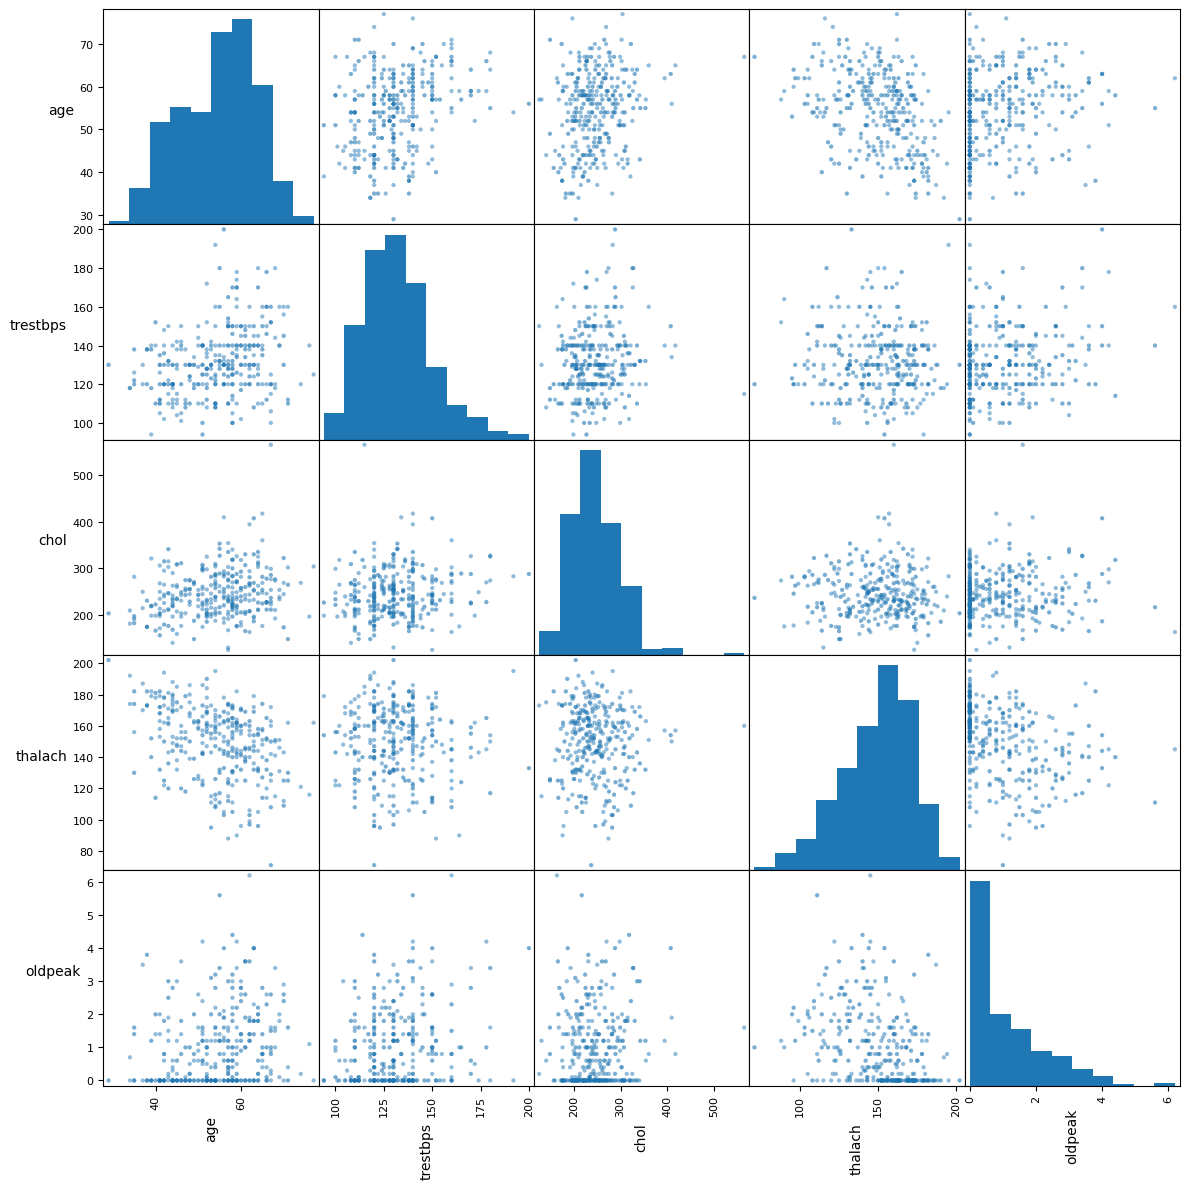

In [ ]:
#We can also visually look for patterns in the data.
sel_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
selheart_disease_df = heart_disease_df[sel_cols]
fig, axes = plt.subplots(nrows=len(selheart_disease_df.columns), ncols=len(selheart_disease_df.columns), figsize=(12, 12))
scatter_matrix = pd.plotting.scatter_matrix(selheart_disease_df, alpha=0.2, ax=axes)

for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

## **Preparation**

In [ ]:
#The variable named target contains  the outcomes we would like to predict - ‘0 for ‘abcence of heart disease while 1 being present of heart disease.We can look at the counts for both outcomes, using the value_counts() function. When we set the normalize setting to True we get the the proportions.
cntDiag = heart_disease_df["target"].value_counts()
cntDiag

1    526
0    499
Name: target, dtype: int64

In [ ]:
propDiag = heart_disease_df["target"].value_counts(normalize=True)
print(propDiag)

1    0.513171
0    0.486829
Name: target, dtype: float64


In [ ]:
heart_disease_df["target"],heart_disease_df["target"].astype("category")

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1020    1
 1021    0
 1022    0
 1023    1
 1024    0
 Name: target, Length: 1025, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1020    1
 1021    0
 1022    0
 1023    1
 1024    0
 Name: target, Length: 1025, dtype: category
 Categories (2, int64): [0, 1])

In [ ]:
heart_disease_df[["age","trestbps","chol"]].describe()

,age,trestbps,chol
count,1025.000000,1025.000000,1025.00000
mean,54.434146,131.611707,246.00000
std,9.072290,17.516718,51.59251
min,29.000000,94.000000,126.00000
25%,48.000000,120.000000,211.00000
50%,56.000000,130.000000,240.00000
75%,61.000000,140.000000,275.00000
max,77.000000,200.000000,564.00000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(X):
    scaler = MinMaxScaler()
    normalized_X = scaler.fit_transform(X)
    return normalized_X

In [ ]:
#Finding the optimal test size & random states
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def find_optimal_test_params(X, y, test_sizes=[0.1, 0.15, 0.2, 0.25, 0.3], random_states=[0, 42, 100], model=KNeighborsClassifier()):
    """
    Find the optimal test size and random state for splitting the dataset.

    Parameters:
    - X: Features matrix
    - y: Target vector
    - test_sizes: List of test sizes to evaluate (default: [0.1, 0.15, 0.2, 0.25, 0.3])
    - random_states: List of random states to evaluate (default: [0, 42, 100])
    - model: Model to train and evaluate (default: KNeighborsClassifier())

    Returns:
    - optimal_test_size: Optimal test size
    - optimal_random_state: Optimal random state
    - best_score: Best evaluation score achieved
    """
    best_score = 0
    optimal_test_size = None
    optimal_random_state = None

    for test_size in test_sizes:
        for random_state in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            if score > best_score:
                best_score = score
                optimal_test_size = test_size
                optimal_random_state = random_state

    return optimal_test_size, optimal_random_state, best_score

In [ ]:
optimal_test_size, optimal_random_state, best_score = find_optimal_test_params(X, y)
print("Optimal Test Size:", optimal_test_size)
print("Optimal Random State:", optimal_random_state)
print("Best Score:", best_score)

Optimal Test Size: 0.1
Optimal Random State: 42
Best Score: 0.7766990291262136


In [ ]:
from sklearn.model_selection import train_test_split


X = heart_disease_df.drop('target', axis=1)  # Assuming 'target' is the column indicating the presence of heart disease
y = heart_disease_df['target']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalizing the train and test sets
print("Normalized Training Data:")
print(X_train_normalized)

# Print the normalized testing data
print("Normalized Testing Data:")
print(X_test_normalized)

Normalized Training Data:
[[0.41666667 1.         0.66666667 ... 1.         0.75       0.66666667]
 [0.72916667 0.         0.         ... 1.         0.         0.66666667]
 [0.52083333 0.         0.66666667 ... 1.         0.         0.66666667]
 ...
 [0.45833333 1.         0.         ... 1.         0.         1.        ]
 [0.29166667 1.         0.         ... 1.         0.         1.        ]
 [0.47916667 1.         0.         ... 1.         0.25       0.66666667]]
Normalized Testing Data:
[[0.70212766 0.         0.         ... 1.         0.         0.66666667]
 [0.5106383  0.         0.66666667 ... 1.         0.         0.        ]
 [0.55319149 1.         0.         ... 0.5        0.25       1.        ]
 ...
 [0.31914894 1.         0.66666667 ... 1.         0.         0.66666667]
 [0.68085106 1.         0.         ... 1.         0.25       1.        ]
 [0.61702128 1.         0.66666667 ... 0.5        0.25       1.        ]]


In [ ]:
def normalize(column):
    scaler = MinMaxScaler()
    normalized_column = scaler.fit_transform(column.values.reshape(-1, 1))
    return normalized_column.flatten()
    excluded = ["target"]
    X = heart_disease_df.drop(excluded, axis=1)
    # Apply normalization to each column
X_normalized = X.apply(normalize, axis=0)
# Print the description of the selected features after normalization
print(X_normalized[["age", "trestbps", "chol"]].describe())



               age     trestbps         chol
count  1025.000000  1025.000000  1025.000000
mean      0.529878     0.354827     0.273973
std       0.189006     0.165252     0.117791
min       0.000000     0.000000     0.000000
25%       0.395833     0.245283     0.194064
50%       0.562500     0.339623     0.260274
75%       0.666667     0.433962     0.340183
max       1.000000     1.000000     1.000000


In [ ]:
#now we can split our data into training and tests sets
y = heart_disease_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

## **Modeling & Evaluation**

In [ ]:
#finding optimum K value
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

def find_optimal_k(X, y, k_range=range(1, 21), cv=5):
    """
    Find the optimal value of K for KNN using cross-validation.

    Parameters:
    - X: Features matrix
    - y: Target vector
    - k_range: Range of K values to evaluate (default: 1 to 20)
    - cv: Number of folds for cross-validation (default: 5)

    Returns:
    - optimal_k: Optimal value of K
    - mean_scores: Mean cross-validation scores for each K value
    """
    mean_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
        mean_scores.append(scores.mean())

    optimal_k = k_range[np.argmax(mean_scores)]
    return optimal_k, mean_scores

In [ ]:
# Assuming X contains your features and y contains your target variable

optimal_k, mean_scores = find_optimal_k(X, y)
print("Optimal K value:", optimal_k)
print("Mean cross-validation scores:", mean_scores)

Optimal K value: 1
Mean cross-validation scores: [0.9824390243902439, 0.9356097560975609, 0.8907317073170733, 0.8, 0.7473170731707317, 0.744390243902439, 0.72, 0.7112195121951219, 0.7268292682926829, 0.7239024390243902, 0.7043902439024391, 0.7131707317073172, 0.6887804878048781, 0.6946341463414635, 0.7102439024390245, 0.7307317073170732, 0.7326829268292683, 0.7170731707317073, 0.7073170731707318, 0.702439024390244]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# # make predictions on the test set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7766990291262136


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        58
           1       0.71      0.82      0.76        45

    accuracy                           0.78       103
   macro avg       0.78      0.78      0.78       103
weighted avg       0.79      0.78      0.78       103



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[43, 15],
       [ 8, 37]])

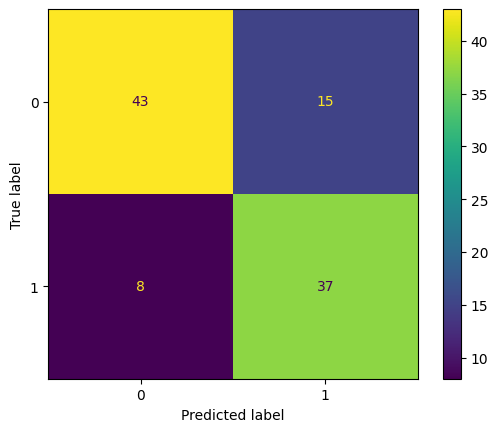

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()